# Single Model

Bellman equation for single individual j working in period t:
$$V_{t}(s_{t}^{j},\varepsilon_{t}^{j})=\underset{C_{t},d_{t}^{j}}{max}\left\{ U^{j}(C_{t},d_{t}^{j},s_{t}^{j})+\sigma_{\varepsilon}\varepsilon_{t}(d_{t}^{j})+\beta E_{t}\left[\pi_{t+1}^{j}V_{t+1}^{j}(s_{t+1}^{j},\varepsilon_{t+1}^{j})+(1-\pi_{t+1}^{j})B(a_{t})\right]\right\} $$

Bellman equation for single individual j retired in period t:
$$V_{t}(s_{t}^{j},\varepsilon_{t}^{j})=\underset{C_{t},d_{t}^{j}}{max}\left\{ U^{j}(C_{t},0,s_{t}^{j})+\beta E_{t}\left[\pi_{t+1}^{j}V_{t+1}^{j}(s_{t+1}^{j},\varepsilon_{t+1}^{j})+(1-\pi_{t+1}^{j})B(a_{t})\right]\right\} $$

Budget constraint:
$$\underset{=m_{t}}{\underbrace{C_{t}+a_{t}}}=Ra_{t-1}+y_{t}^{j}+P^j(s_t)$$

The bequest motive:
$$B(a_{t})=\gamma a_{t}$$

Preferences (CRRA):
$$U^{j}(C_{t},d_{t}^{j},s_{t}^{j})=\frac{C_{t}^{1-\rho}}{1-\rho}+\alpha^{j}(s_{t}^{j})1_{\left\{ d_{t}^{j}=0\right\} }$$

State variables:
$$s_t = (age^j_t, d^j_t, y^j_t, \zeta_t,e^j,, elig^j, ch^j, a_{t-1})$$

We have not included the two state variables Grandchilden and health. 
Vi har efter bedste evne taget parametrene fra din artikel til modelløsningen.

# Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

In [2]:
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2
from Model import RetirementModelClass
import numpy as np
import matplotlib.pyplot as plt
import funs
import figs

# Solution and simulation

### Solve model and initialize simulation

In [12]:
import itertools
states = list(itertools.product([0,1],repeat=4))

model_men = RetirementModelClass(name='men',states=states[8:])
model_women = RetirementModelClass(name='women',states=states[:8])
model_men.solve()
model_women.solve()

In [5]:
# Wealth distribution
np.random.seed(2019)
dev = 1.25
M_init = np.random.lognormal(-0.5*(dev**2),dev,model_men.par.simN)+0.8
model_men.par.simM_init = M_init
model_women.par.simM_init = M_init
print('mean:',np.mean(M_init))
print('std:',np.std(M_init))

# Allocate states
model_men.par.simStates = funs.create_states(model_men,'male',0.95,0.2,0.55)
model_women.par.simStates = funs.create_states(model_women,'female',0.97,0.27,0.8)

mean: 1.8170682300256835
std: 1.6525118057867347
fractions: [0.95 0.2  0.55]
fractions: [0.97 0.27 0.8 ]


### Simulate model

In [6]:
model_men.simulate()
model_women.simulate()

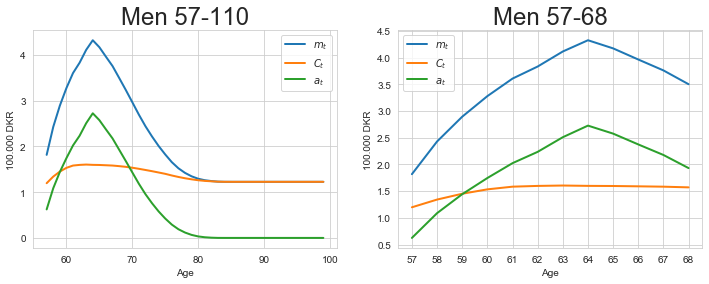

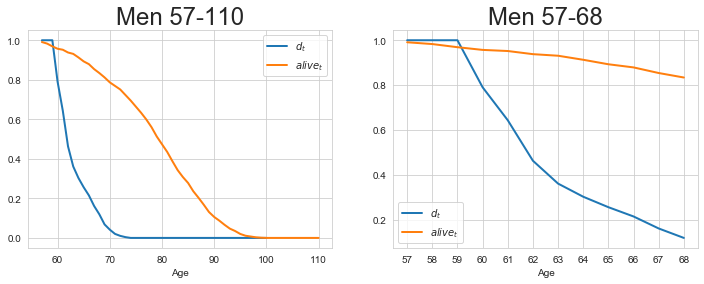

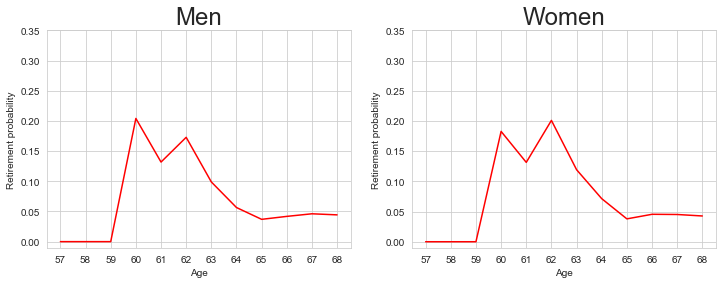

In [7]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.lifecycle(model_men,axs[0],ages=[57,110])
axs[0].set_title('Men 57-110',size=24)
figs.lifecycle(model_men,axs[1])
axs[1].set_title('Men 57-68',size=24)

fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.lifecycle(model_men,axs[0],['d','alive'],ages=[57,110])
axs[0].set_title('Men 57-110',size=24)
figs.lifecycle(model_men,axs[1],['d','alive'])
axs[1].set_title('Men 57-68',size=24)

fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(model_men,axs[0])
axs[0].set_title('Men',size=24)
figs.retirement_probs(model_women,axs[1])
axs[1].set_title('Women',size=24)
plt.show()

# Visualizing the solution

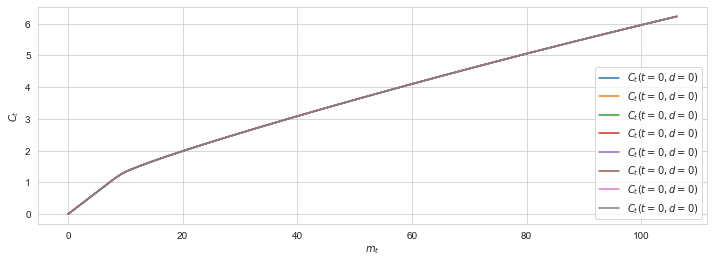

In [22]:
fig, axs = plt.subplots(figsize=(12,4))
figs.policy(model_men,axs,var='c',time=0,states=[0,1,2,3,4,5,6,7],age_dif=0,d_choice=[0])
plt.show()

# Save the solution

In [8]:
model_men.save()
model_women.save()

# Accuracy test

In [9]:
np.random.seed(2019)
for na in [100,150,200]:
    for a_max in [10,50,100]:
        model = RetirementModelClass(Na = na, a_max = a_max) # sensitive to a_max
        model.solve()
        model.simM_init = M_init
        model.par.simStates = np.random.randint(16,size=model.par.simN) # allocate random states
        model.simulate(accuracy_test=True)
        print('Na:',na,'a_max',a_max)
        print('Euler error:',np.nanmean(np.log10(abs(model.sim.euler / model.sim.c[:53,:]))))

Na: 100 a_max 10
Euler error: -2.705031157847862
Na: 100 a_max 50
Euler error: -2.6293815055201155
Na: 100 a_max 100
Euler error: -2.615415633500159
Na: 150 a_max 10
Euler error: -2.739630618560711
Na: 150 a_max 50
Euler error: -2.6371982130827214
Na: 150 a_max 100
Euler error: -2.6242740266583855
Na: 200 a_max 10
Euler error: -2.748494670777781
Na: 200 a_max 50
Euler error: -2.645585343507779
Na: 200 a_max 100
Euler error: -2.629042234843742


C:\Users\Frederik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


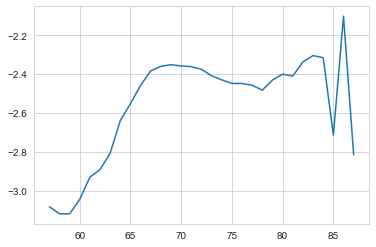

In [10]:
plt.plot(np.arange(57,110),np.nanmean(np.log10(abs(model.sim.euler) / model.sim.c[:53,:]),axis=1))

C:\Users\Frederik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


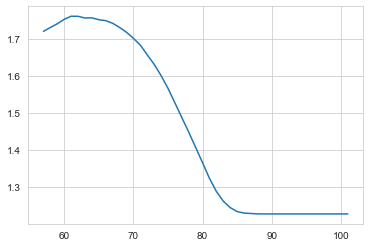

In [11]:
plt.plot(np.arange(57,111),np.nanmean(model.sim.c, axis=1))

# Time the model and simulation

In [ ]:
model = RetirementModelClass(name='baseline',solmethod='egm')
model.par.states = [(0,0,0,1), (0,1,0,1), (1,0,0,1), (1,1,0,1)] # only 4 states across gender and elig
np.random.seed(2019)
model.par.simStates = np.random.randint(4,size=model.par.simN) # random states

In [13]:
def solve():
    model.solve() 
    
def simulate():
    model.simulate()

funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve'),
              (funcs[1], 'simulate')])

Run model/simulation 10 times

In [14]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=10)

time unit is: s
+----------+------+--------+------+-----+-------+
|   func   |  lq  | median | mean |  uq | neval |
+----------+------+--------+------+-----+-------+
|  solve   | 4.69 |  4.73  | 4.74 | 4.8 |  10.0 |
| simulate | 1.28 |  1.29  | 1.3  | 1.3 |  10.0 |
+----------+------+--------+------+-----+-------+


In [17]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=10)

time unit is: s
+----------+------+--------+------+------+-------+
|   func   |  lq  | median | mean |  uq  | neval |
+----------+------+--------+------+------+-------+
|  solve   | 4.88 |  5.05  | 5.02 | 5.14 |  10.0 |
| simulate | 1.41 |  1.44  | 1.46 | 1.48 |  10.0 |
+----------+------+--------+------+------+-------+


# Estimation

In [7]:
import SimulatedMinimumDistance as SMD

In [200]:
# moment function
from numba import njit

@njit
def mom_fun(data):
    low_noChild = np.mean(data.probs[:20, (data.states == 0) | (data.states == 4)], axis=1)*100
    low_Child = np.mean(data.probs[:20, (data.states == 1) | (data.states == 5)], axis=1)*100
    high_noChild = np.mean(data.probs[:20, (data.states == 2) | (data.states == 6)], axis=1)*100
    high_Child = np.mean(data.probs[:20, (data.states == 3) | (data.states == 7)], axis=1)*100
    return np.hstack((low_noChild, low_Child, high_noChild, high_Child))
        
# create data
import itertools
states = list(itertools.product([0,1],repeat=4))
states = states[:8]
model = RetirementModelClass(states=states, a_max = 10, simN = 5000)
model.solve()

# Allocate states
#model.par.simStates = funs.create_states(model,'female',0.5,0.5,0.5)
ind = int(model.par.simN/8)
states = np.hstack((0*np.ones(ind), 1*np.ones(ind), 2*np.ones(ind), 3*np.ones(ind), 
                    4*np.ones(ind), 5*np.ones(ind), 6*np.ones(ind), 7*np.ones(ind)))
states = np.array(states, dtype=int)
model.par.simStates = states
model.simulate()
mom_data = mom_fun(model.sim)

# prep
weight = np.eye(len(mom_data))
true = [model.par.alpha_0_female, model.par.alpha_1, model.par.alpha_2]
theta0 = [i*3 for i in true]
add_str = '_est'
est_par = ("alpha_0_female", "alpha_1", "alpha_2") # remember to be list if only 1 var

In [202]:
# Estimate the baseline model
model_base = model
model_base.prep = True # to do 

smd_base = SMD.SimulatedMinimumDistance(model_base,mom_data,mom_fun,print_iter=True,options={'disp':True})
smd_base.est_par = est_par
smd_base.estimate(theta0,weight)
theta_base = smd_base.est

theta_base - true

# update model parameters
#for p in range(len(est_par)):
#    setattr(model_base.par,est_par[p],theta_base[p]) 

# solve and simulate model
#model_base.solve() 
#model_base.draw_random()
#model_base.simulate()

 alpha_0_female=0.507 alpha_1=0.159 alpha_2=-0.108 -> 2724.0355
 alpha_0_female=0.532 alpha_1=0.159 alpha_2=-0.108 -> 2996.9395
 alpha_0_female=0.507 alpha_1=0.167 alpha_2=-0.108 -> 2770.4792
 alpha_0_female=0.507 alpha_1=0.159 alpha_2=-0.113 -> 2694.5746
 alpha_0_female=0.482 alpha_1=0.164 alpha_2=-0.112 -> 2479.5252
 alpha_0_female=0.456 alpha_1=0.167 alpha_2=-0.113 -> 2217.4639
 alpha_0_female=0.473 alpha_1=0.156 alpha_2=-0.115 -> 2317.0023
 alpha_0_female=0.451 alpha_1=0.163 alpha_2=-0.120 -> 2101.7649
 alpha_0_female=0.422 alpha_1=0.164 alpha_2=-0.126 -> 1801.1099
 alpha_0_female=0.394 alpha_1=0.166 alpha_2=-0.123 -> 1559.3691
 alpha_0_female=0.338 alpha_1=0.170 alpha_2=-0.128 -> 1038.5278
 alpha_0_female=0.338 alpha_1=0.178 alpha_2=-0.130 -> 1077.6112
 alpha_0_female=0.276 alpha_1=0.174 alpha_2=-0.142 -> 579.0818
 alpha_0_female=0.186 alpha_1=0.178 alpha_2=-0.157 -> 305.1251
 alpha_0_female=0.152 alpha_1=0.185 alpha_2=-0.150 -> 322.4252
 alpha_0_female=0.113 alpha_1=0.178 alpha_2

array([ 2.83388858e-05, -1.48831052e-05, -6.52518255e-07])

In [150]:
theta_base - true

array([ 3.36353378e-05, -3.58135234e-05])